In [1]:
from utils.TimeCorrelationCalculator import TimeCorrelationCalculator
from utils.TimeCorrelationViewer import TimeCorrelationViewer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import utils.sulfur.constant as const

In [2]:
def file_path_builder(animal_name):
    return '../resources/%s_Longitudinal_Traces.csv' % animal_name

In [3]:
def means_of_sum_correlation(context_name, start, end):
    df = pd.DataFrame(0.0, columns=['shuffle cells', 'engram cells', 'non-engram cells'], index=const.ANIMAL_NAMES)
    for animal_name in const.ANIMAL_NAMES:
        file_path = file_path_builder(animal_name)
        calculator = TimeCorrelationCalculator(file_path)
        
        result = calculator.calc(context_name=context_name, start=start, end=end)
        viewer = TimeCorrelationViewer(*result)
        scaled_shuffle, scaled_engram, scaled_non_engram = viewer.scaled_shuffle_df, viewer.scaled_engram_df, viewer.scaled_non_engram_df
        
        df.loc[animal_name, 'shuffle cells']    = scaled_shuffle.sum().mean()
        df.loc[animal_name, 'engram cells']     = scaled_engram.sum().mean()
        df.loc[animal_name, 'non-engram cells'] = scaled_non_engram.sum().mean()
        
    print(df)
    return df

In [4]:
def ratio_of_sum_correlation(df, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(title)
    
    means = df.mean()
    errors = df.sem()
    x = np.arange(0, 3.1, 1.5)
    ax.bar(x=0.0, height=means['non-engram cells'], label='non-engram cells', yerr=errors['non-engram cells'], capsize=2, align='center', color='green')
    ax.bar(x=1.5, height=means['engram cells'], label='engram cells', yerr=errors['engram cells'], capsize=2, align='center', color='orange')
    ax.bar(x=3.0, height=means['shuffle cells'], label='shuffle cells', yerr=errors['shuffle cells'], capsize=2, align='center', color='royalblue')
    ax.set_xticks(x)
    ax.set_xticklabels(labels=['non-engram cells', 'engram cells', 'shuffle cells'], fontsize=20)
    ax.set_ylabel('ratio of sum all correlation', fontsize=20)
    
    for index, row in df.iterrows():
        engram_value = row[1]
        non_engram_value = row[2]
        shuffle_value = row[0]
        ax.plot(np.array([0.5, 1.0]), np.array([non_engram_value, engram_value]), marker='x', color='grey')
        ax.plot(np.array([2.0, 2.5]), np.array([engram_value, shuffle_value]), marker='x', color='grey')
    fig.show()

In [5]:
df_per_context = {}

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

              shuffle cells  engram cells  non-engram cells
ID181106CreA       0.062465      1.256003          1.816901
ID181106CreB       0.188724      1.349108          2.050452
ID181106CreC       0.205954      1.576042          1.659023
ID181106CreG      -0.116117      1.675813          2.266911
ID181106CreH       0.080813      1.519608          1.731328
ID181106CreI       0.186687      1.804130          1.775914
ID181106CreK       0.014143      2.553153          2.949376
ID181106CreL       0.058646      2.272484          1.781919
ID181106CreN       0.079563      1.740700          1.709995
ID181106CreQ       0.081000      1.834737          1.693194


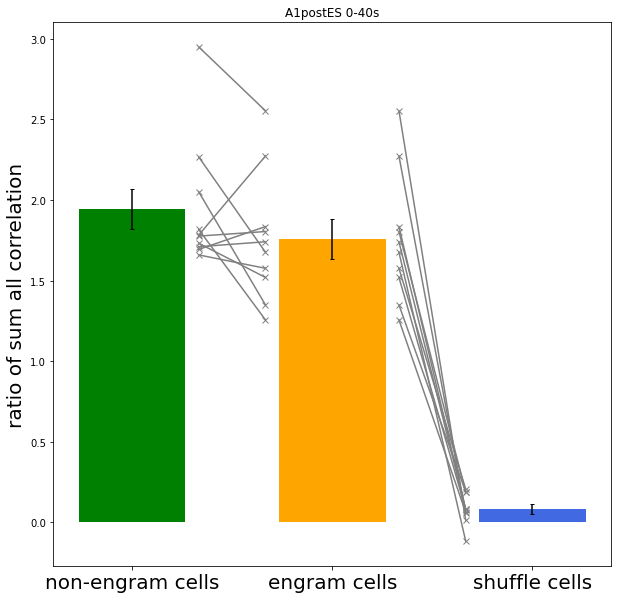

In [6]:
df = means_of_sum_correlation('A1postES', 0, 40)
ratio_of_sum_correlation(df, 'A1postES 0-40s')
df_per_context['A1postES_0-40'] = df

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

              shuffle cells  engram cells  non-engram cells
ID181106CreA       0.022151      1.926907          2.080817
ID181106CreB       0.210683      1.812312          1.745927
ID181106CreC       0.219912      1.751345          1.775235
ID181106CreG       0.110042      1.715375          1.656603
ID181106CreH       0.108140      1.252744          1.620801
ID181106CreI       0.122872      2.885559          2.537413
ID181106CreK      -0.359620      1.473015          2.868513
ID181106CreL       0.093422      1.482140          1.576843
ID181106CreN       0.012440      1.304330          2.060617
ID181106CreQ       0.102872      1.758636          1.671606


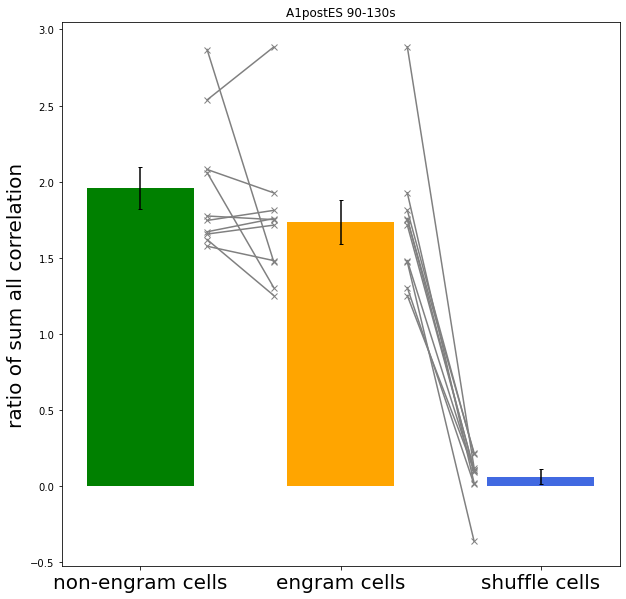

In [7]:
df = means_of_sum_correlation('A1postES', 90, 130)
ratio_of_sum_correlation(df, 'A1postES 90-130s')
df_per_context['A1postES_90-130'] = df

In [ ]:
df = means_of_sum_correlation('A1postES', 180, 220)
ratio_of_sum_correlation(df, 'A1postES 180-220s')
df_per_context['A1postES_180-220'] = df

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
df = means_of_sum_correlation('A1preES', 0, 40)
ratio_of_sum_correlation(df, 'A1preES 0-40s')
df_per_context['A1preES_0-40'] = df

In [ ]:
df = means_of_sum_correlation('A2_1', 0, 40)
ratio_of_sum_correlation(df, 'A2_1 0-40s')
df_per_context['A2_1_0-40'] = df

In [ ]:
df = means_of_sum_correlation('A2_2', 260, 300)
ratio_of_sum_correlation(df, 'A2_2 260-300s')
df_per_context['A2_2_260-300'] = df

In [ ]:
df = means_of_sum_correlation('A3_1', 0, 40)
ratio_of_sum_correlation(df, 'A3_1 0-40s')
df_per_context['A3_1_0-40'] = df

df = means_of_sum_correlation('A3_2', 260, 300)
ratio_of_sum_correlation(df, 'A3_2 260-300s')
df_per_context['A3_2_260-300'] = df

In [ ]:
df = means_of_sum_correlation('B1', 0, 40)
ratio_of_sum_correlation(df, 'B1 0-40s')
df_per_context['B1_0-40'] = df

df = means_of_sum_correlation('B1', 260, 300)
ratio_of_sum_correlation(df, 'B1 260-300s')
df_per_context['B1_260-300'] = df

In [ ]:
df = means_of_sum_correlation('A4postES', 0, 40)
ratio_of_sum_correlation(df, 'A4postES 0-40s')
df_per_context['A4postES_0-40'] = df

df = means_of_sum_correlation('A4postES', 90, 130)
ratio_of_sum_correlation(df, 'A4postES 90-130s')
df_per_context['A4postES_90-130'] = df

df = means_of_sum_correlation('A4postES', 180, 220)
ratio_of_sum_correlation(df, 'A4postES 180-220s')
df_per_context['A4postES_180-220'] = df

In [ ]:
df = means_of_sum_correlation('A5', 0, 40)
ratio_of_sum_correlation(df, 'A5 0-40s')
df_per_context['A5_0-40'] = df

df = means_of_sum_correlation('A5', 260, 300)
ratio_of_sum_correlation(df, 'A5 260-300s')
df_per_context['A5_260-300'] = df

In [ ]:
df = means_of_sum_correlation('B2', 0, 40)
ratio_of_sum_correlation(df, 'B2 0-40s')
df_per_context['B2_0-40'] = df

df = means_of_sum_correlation('B2', 260, 300)
ratio_of_sum_correlation(df, 'B2 260-300s')
df_per_context['B2_260-300'] = df

In [ ]:
df_per_context

In [ ]:
from scipy.stats import f_oneway

for context, df in df_per_context.items():
    _, pvalue = f_oneway(df.loc[:, 'all cells'], df.loc[:, 'engram cells'], df.loc[:, 'non-engram cells'])
    print('context_name: %s' % context)
    print(pvalue)